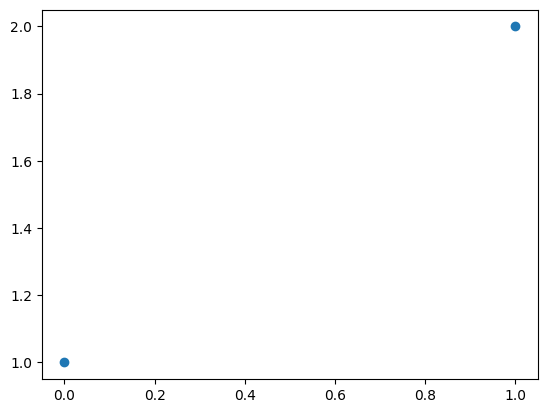

In [1]:
import sys
sys.path.append('f:/seismic/code/core')
sys.path.append('/seismic/code/core')
sys.path.append('/kaggle/input/my-seismic-library/')
import kaggle_support as kgs
import importlib
import numpy as np
import matplotlib.pyplot as plt
import glob
import copy
import os
import seis_forward
import seis_nn
import seis_test
plt.scatter([0,1],[1,2])
#fls.download_kaggle_dataset('jeroencottaar/byu-many-models-2/', fls.result_dir + '/many_full_res/')

In [2]:
import seis_test
seis_test.run_all_tests()

3.544453883175856e-05
1.5741465383079042e-05
All tests passed!


In [3]:
importlib.reload(kgs)
data=kgs.load_all_train_data(validation_only=True)
len(data)

5000

In [4]:
importlib.reload(seis_nn)
model = seis_nn.make_default_pretrained()

F:/seismic/models/brendan/*.pth
Loading:  F:/seismic/models/brendan\bartley_unet2d_convnext_seed1_epochbest_FT.pth
Replacing all activations with GELU...
Replacing all norms with InstanceNorm...
Replacing forward functions...
Loading:  F:/seismic/models/brendan\bartley_unet2d_convnext_seed2_epochbest_FT.pth
Replacing all activations with GELU...
Replacing all norms with InstanceNorm...
Replacing forward functions...
n_models: 2


In [5]:
model.read_cache=False
data_out = model.infer(data)


00%|██████████████████████████████████████████████████████████████████████████████████| 17/17 [00:53<00:00,  3.15s/it]

In [6]:
kgs.score_metric(data_out);
del data_out

         family      score
0  CurveFault_A   4.556020
1  CurveFault_B  86.555970
2    CurveVel_A  12.532248
3    CurveVel_B  46.475796
4   FlatFault_A   3.107606
5   FlatFault_B  33.492327
6     FlatVel_A   1.616611
7     FlatVel_B   8.586432
8       Style_A  36.136412
9       Style_B  55.954558
Combined:  28.901398133948504


In [7]:
# import cupy as cp
# for i_base in range(10):
#     for ii in 500*i_base+np.arange(1):
#         data_out[ii].velocity.load_to_memory()
#         print(ii, data_out[ii].family, cp.mean(cp.abs(data_out[ii].velocity.data-data_out[ii].velocity_guess.data)), (data_out[ii].velocity.data-data_out[ii].velocity_guess.data)[0,0], 
#              (data_out[ii].velocity.data-data_out[ii].velocity_guess.data)[-1,-1])
#         plt.figure();plt.imshow(cp.asnumpy(data_out[ii].velocity.data));plt.colorbar()
#         plt.figure();plt.imshow(cp.asnumpy(data_out[ii].velocity_guess.data));plt.colorbar()
#         plt.figure();plt.imshow(cp.asnumpy(data_out[ii].velocity.data-data_out[ii].velocity_guess.data));plt.colorbar()        
#         plt.pause(0.0001)

In [8]:
importlib.reload(kgs)
importlib.reload(seis_nn)
data = kgs.load_all_test_data()
print(len(data))
model = seis_nn.make_default_pretrained()
data_out = model.infer(data)

65818
F:/seismic/models/brendan/*.pth
Loading:  F:/seismic/models/brendan\bartley_unet2d_convnext_seed1_epochbest_FT.pth
Replacing all activations with GELU...
Replacing all norms with InstanceNorm...
Replacing forward functions...
Loading:  F:/seismic/models/brendan\bartley_unet2d_convnext_seed2_epochbest_FT.pth
Replacing all activations with GELU...
Replacing all norms with InstanceNorm...
Replacing forward functions...
n_models: 2


In [9]:
kgs.dill_save(kgs.temp_dir + 'baseline.pickle', data_out)

In [10]:
data_out = kgs.dill_load(kgs.temp_dir + 'baseline.pickle', data_out)

TypeError: dill_load() takes 1 positional argument but 2 were given

In [ ]:
importlib.reload(kgs)
kgs.write_submission_file(data_out)

In [ ]:
model.model